# 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Read the data as a data frame

In [2]:
data_orig = pd.read_csv('concrete.csv')
data_orig.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## 2.1 Print the descriptive statistics of each & every column using describe() function

In [3]:
data_orig.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# 3. EDA

## 3.1 Shape of the data

In [4]:
print (data_orig.shape)

(1030, 9)


## 3.2 Data type of each attribute

In [5]:
data_orig.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

## 3.3 Checking the presence of missing values

    We see that there no missing values in the dataset. However we would need to do closer inspection to see if there are dummy valuesin the dataset.

In [6]:
# Check for missing value
data_orig.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

## 3.4 Analysing Numeric Attributes

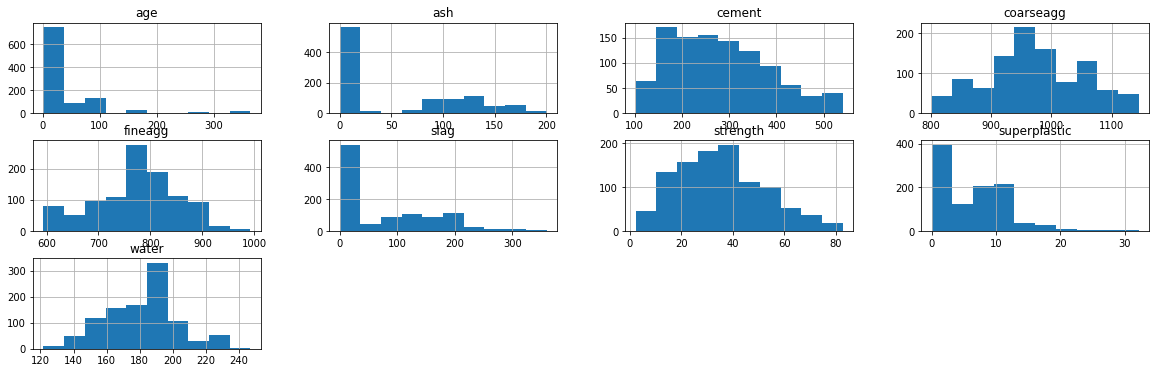

In [7]:
data_orig.hist(bins=10, figsize=(20, 6), layout=(3, 4));

### 3.4.1 - Check Standard Deviation of all numeric attributes

    All attributes have some standard deviation and hence they would not be dropped - for now

In [8]:
data_orig.std()

cement          104.506364
slag             86.279342
ash              63.997004
water            21.354219
superplastic      5.973841
coarseagg        77.753954
fineagg          80.175980
age              63.169912
strength         16.705742
dtype: float64

### 3.4.2 Five point summary

In [9]:
def print_five_point_summary(feature, feature_name, do_print=True):
    median = np.median(feature)
    
    sorted_feature_data = sorted(feature)
    q1, q3= np.percentile(sorted_feature_data,[25,75])

    min_value = np.min(sorted_feature_data)
    max_value = np.max(sorted_feature_data)

    if do_print:
        print ('\nPrinting 5 point summary for %s'%(feature_name))
        print ('-----------------------------------')
        print ('\nMax value of %s is %d'%(feature_name, max_value))
        print ('Min value of %s is %d'%(feature_name, min_value))
        print ('Median value of %s is %d'%(feature_name, median))
        print ('1st Quartile value of %s is %d'%(feature_name, q1))
        print ('3rd Quartile value of %s is %d'%(feature_name, q3))

    five_point_summary = {'median':median,
                         'q1':q1,
                         'q3':q3,
                         'minvalue':min_value,
                         'max_value':max_value}
    return five_point_summary

In [10]:
for col in data_orig.columns:
    print_five_point_summary(data_orig[col], col)


Printing 5 point summary for cement
-----------------------------------

Max value of cement is 540
Min value of cement is 102
Median value of cement is 272
1st Quartile value of cement is 192
3rd Quartile value of cement is 350

Printing 5 point summary for slag
-----------------------------------

Max value of slag is 359
Min value of slag is 0
Median value of slag is 22
1st Quartile value of slag is 0
3rd Quartile value of slag is 142

Printing 5 point summary for ash
-----------------------------------

Max value of ash is 200
Min value of ash is 0
Median value of ash is 0
1st Quartile value of ash is 0
3rd Quartile value of ash is 118

Printing 5 point summary for water
-----------------------------------

Max value of water is 247
Min value of water is 121
Median value of water is 185
1st Quartile value of water is 164
3rd Quartile value of water is 192

Printing 5 point summary for superplastic
-----------------------------------

Max value of superplastic is 32
Min value of su

# Step 4 - Outlier Detection

    We will use BoxPlot to check if there are any outliers in the features which have been provided.
    
    We will identify such features and in next step we will remove the ourlier values.

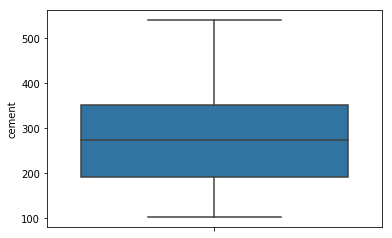

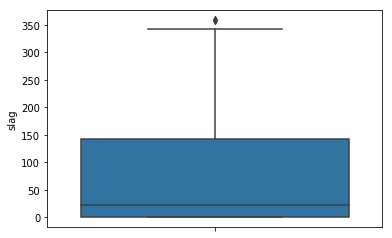

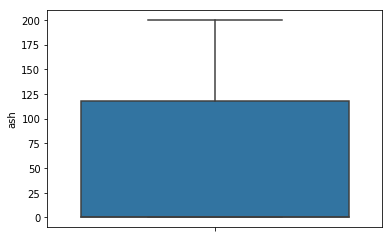

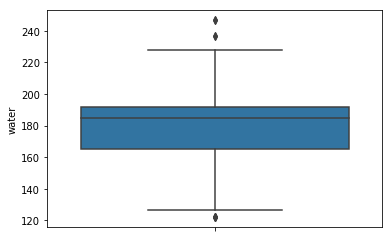

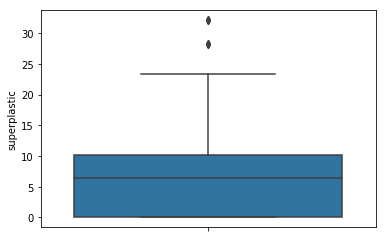

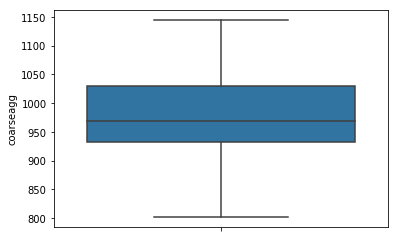

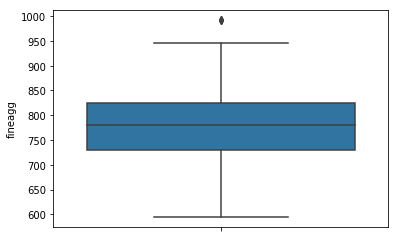

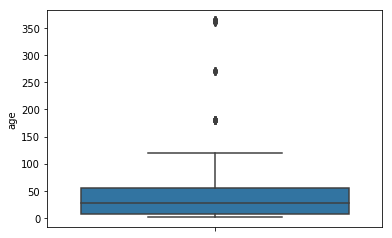

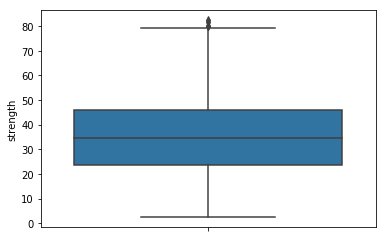

In [11]:
for col in data_orig.columns:
    if (data_orig[col].dtype != 'object'):
        sns.boxplot(data_orig[col], orient='v')
        plt.show()

## Step 4.1 - Remove outlier values using zscore

In [12]:
from scipy.stats import zscore

def remove_outliers (df, feature_name):
    
    rows_before = df.shape[0]
    
    feature_name_zscore = feature_name+'_zscore'
    
    df[feature_name_zscore] = zscore(df[feature_name])
    condition = (df[feature_name_zscore]>3) | (df[feature_name_zscore]<-3)
    df = df.drop(df[condition].index, axis=0, inplace=False)
    df = df.drop([feature_name_zscore], axis=1)
    
    rows_after = df.shape[0]
    
    print ('Number of rows which had outlier value for %s are %d'%(feature_name, (rows_before-rows_after)))
    #sns.boxplot(df[feature_name], orient='v')
    
    return df

In [13]:
data_orig.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [14]:
data_orig = remove_outliers(data_orig, 'cement')
data_orig = remove_outliers(data_orig, 'slag')
data_orig = remove_outliers(data_orig, 'ash')
data_orig = remove_outliers(data_orig, 'water')
data_orig = remove_outliers(data_orig, 'superplastic')
data_orig = remove_outliers(data_orig, 'coarseagg')
data_orig = remove_outliers(data_orig, 'fineagg')
data_orig = remove_outliers(data_orig, 'age')

Number of rows which had outlier value for cement are 0
Number of rows which had outlier value for slag are 4
Number of rows which had outlier value for ash are 0
Number of rows which had outlier value for water are 2
Number of rows which had outlier value for superplastic are 10
Number of rows which had outlier value for coarseagg are 0
Number of rows which had outlier value for fineagg are 0
Number of rows which had outlier value for age are 33


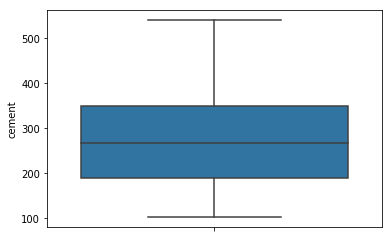

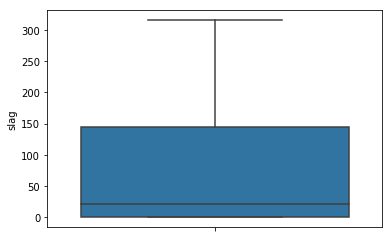

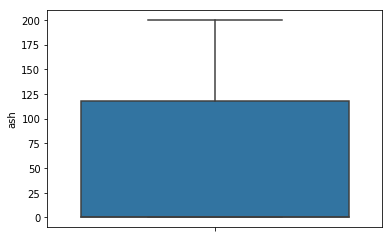

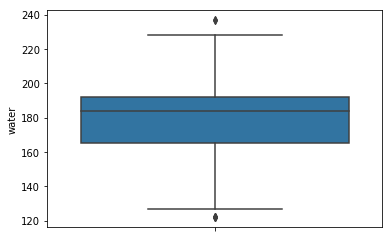

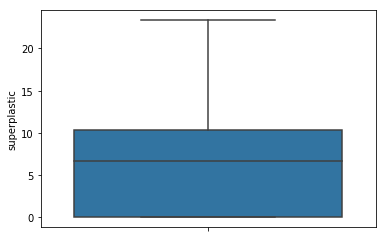

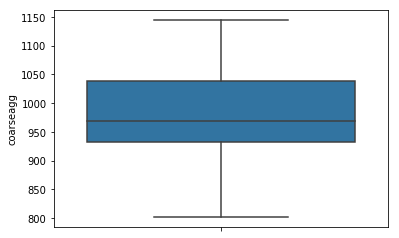

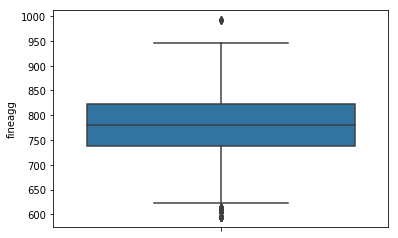

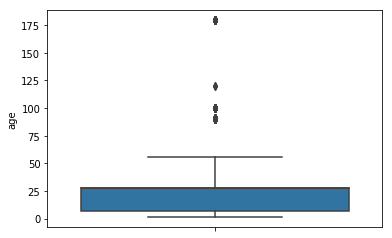

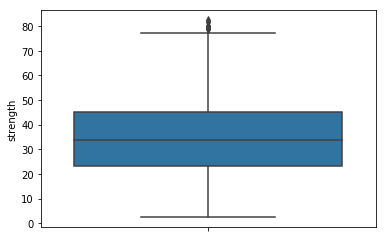

In [15]:
for col in data_orig.columns:
    if (data_orig[col].dtype != 'object'):
        sns.boxplot(data_orig[col], orient='v')
        plt.show()

# Step 5 - Relationship between Different Features

    We will plot a pairplot of all the features in the dataset. This plot gives visual clues to identify the dataset suffers from multicollinearity. This can lead to skewed or misleading results. Luckily, decision trees and boosted trees algorithms are immune to multicollinearity by nature. When they decide to split, the tree will choose only one of the perfectly correlated features. However, other algorithms like Logistic Regression or Linear Regression are not immune to that problem and you should fix it before training the model
    
    In our dataset we will see that there many features which are highly correlated to each other, i.e. positive or negative correlation

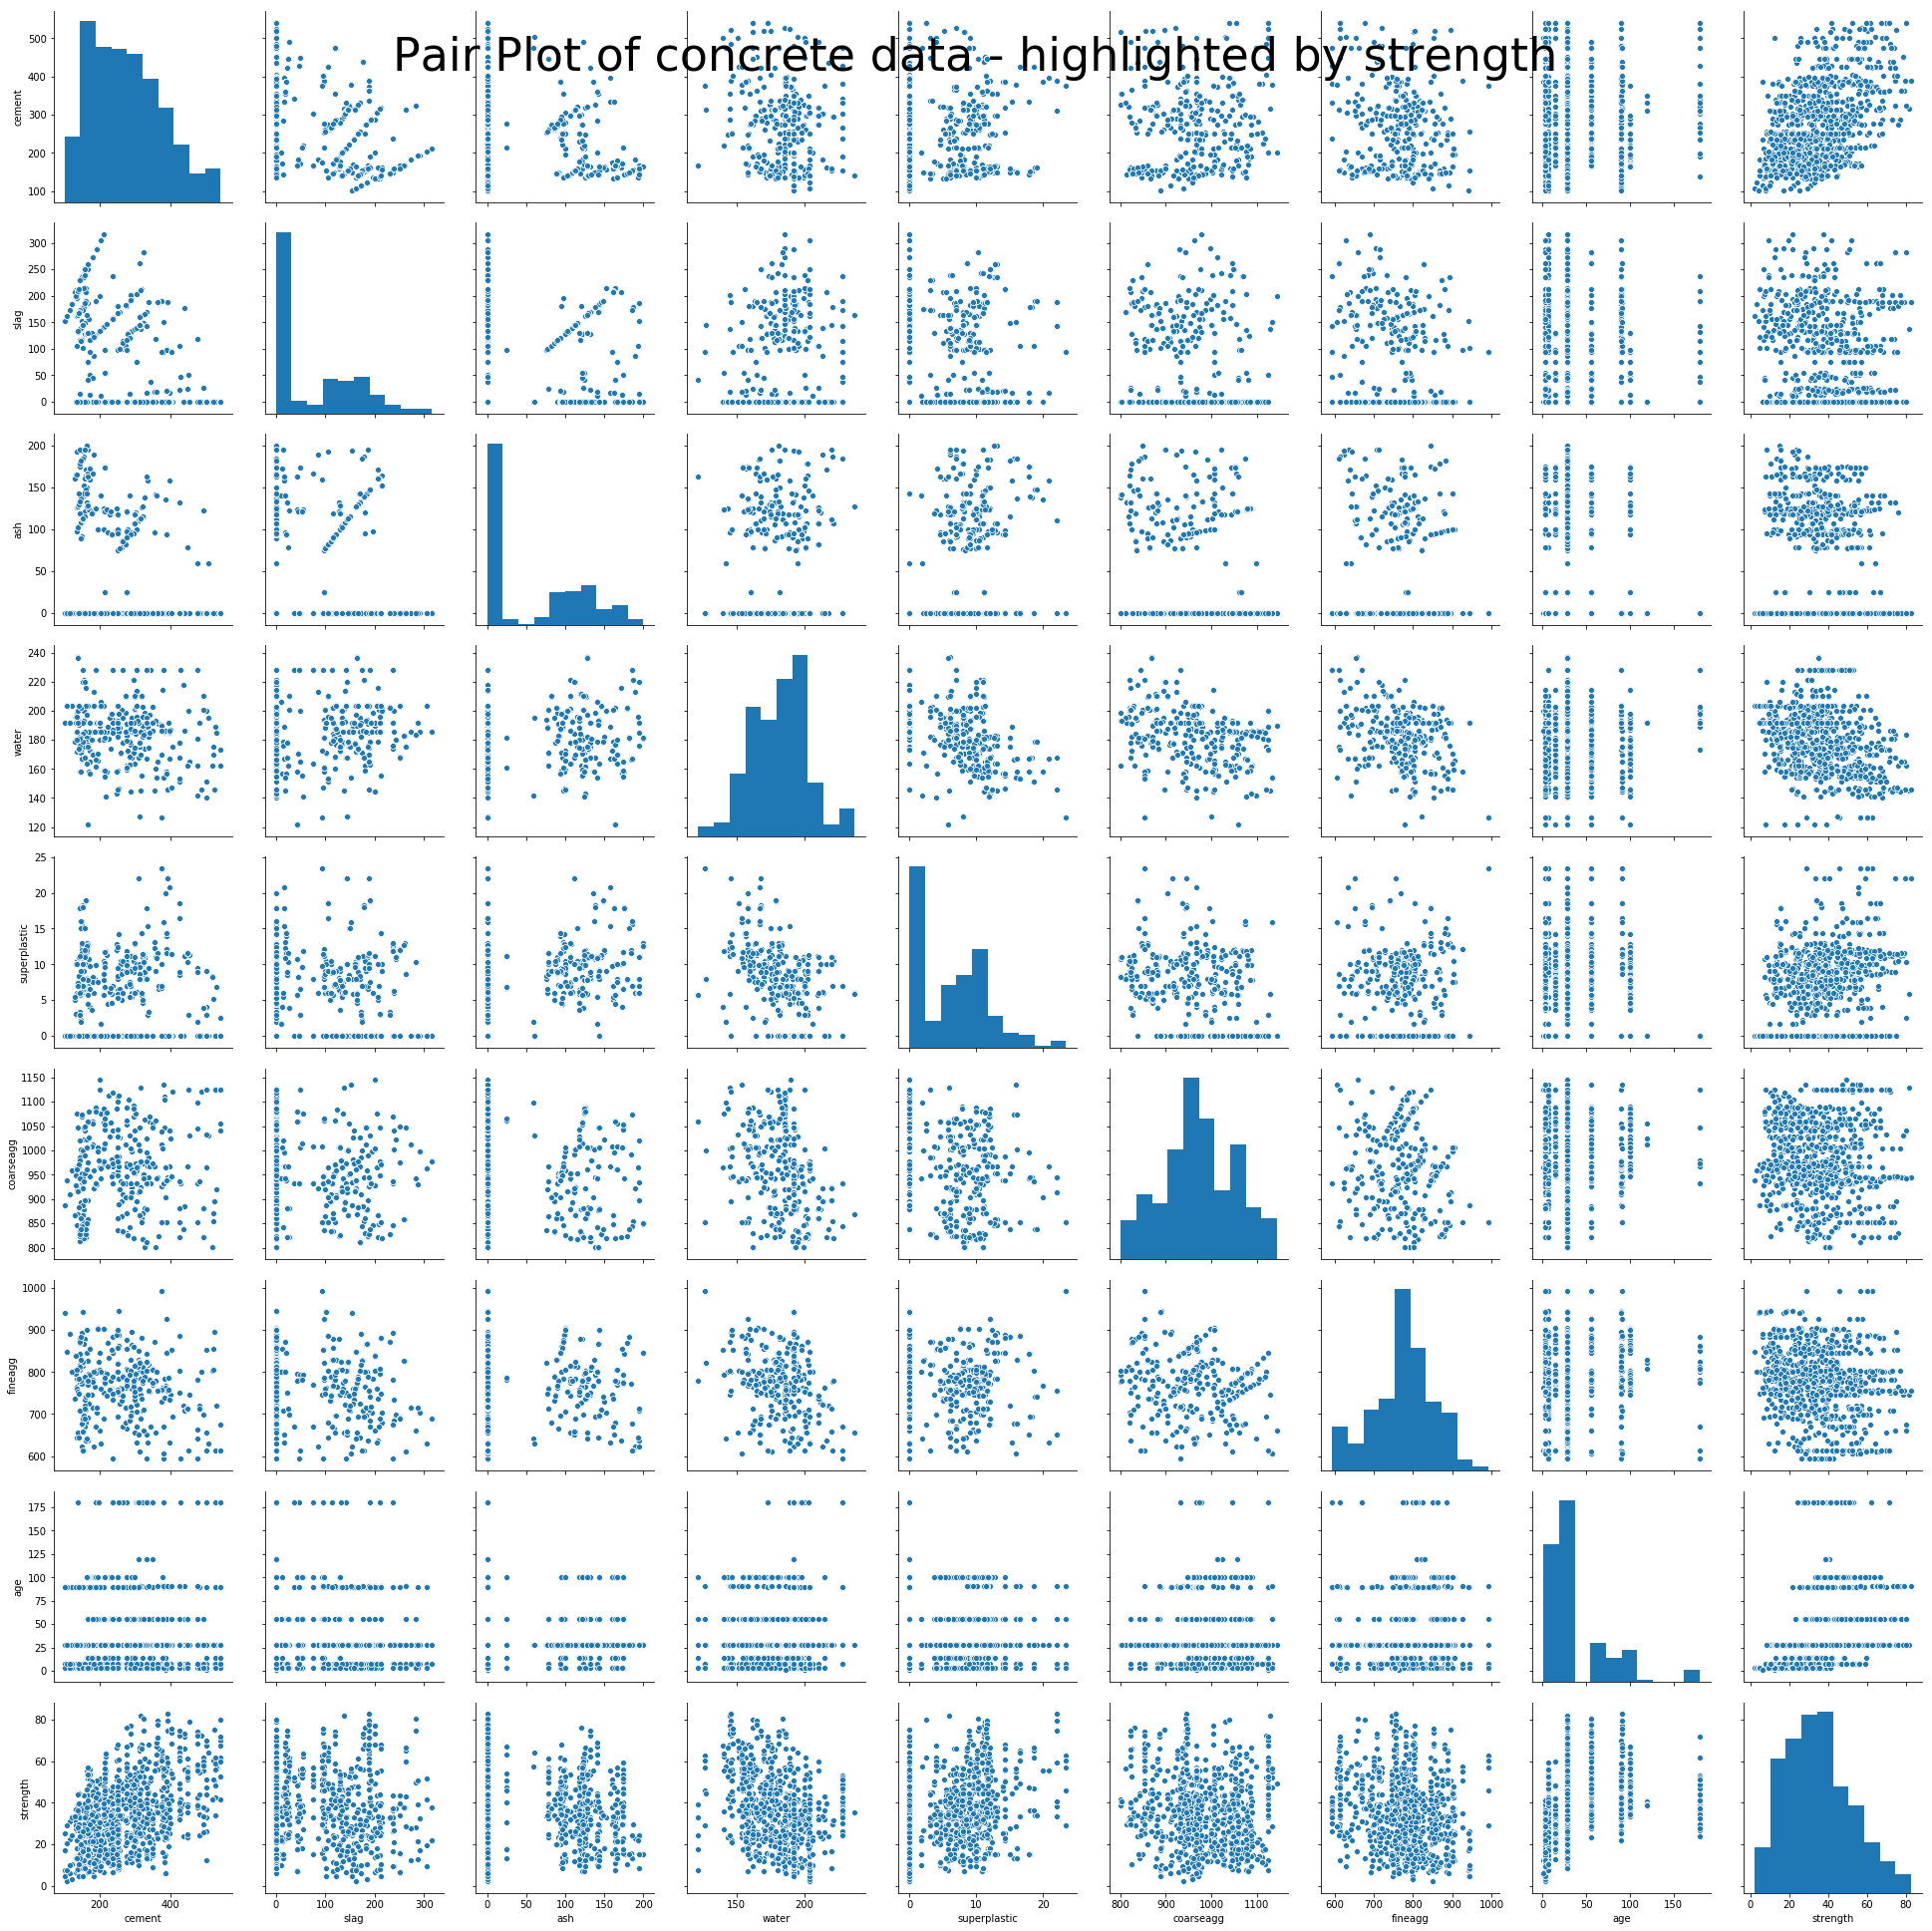

In [16]:
sns.pairplot(data_orig, hue=None,height=3)
plt.suptitle('Pair Plot of concrete data - highlighted by strength', size = 46);

#### Example of Highly Positive Correlation in features

Text(0.5, 1.0, 'Relationship b/w Ash & Superplastic')

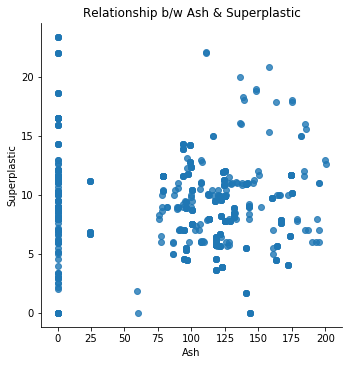

In [17]:
sns.lmplot(x='ash',y='superplastic',data=data_orig, fit_reg=False)
plt.xlabel('Ash')
plt.ylabel('Superplastic')
plt.title('Relationship b/w Ash & Superplastic')

Text(0.5, 1.0, 'Relationship b/w cement & strength')

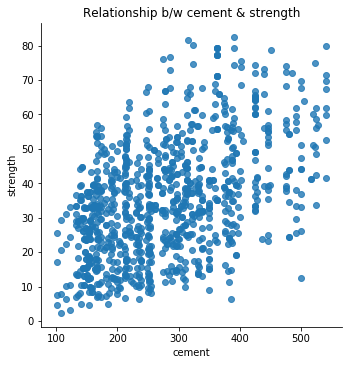

In [18]:
# As expected there is a positive relation b/w cement quantity and strength of concrete
sns.lmplot(x='cement',y='strength',data=data_orig, fit_reg=False)
plt.xlabel('cement')
plt.ylabel('strength')
plt.title('Relationship b/w cement & strength')

#### Example of Highly Negative Correlation in features

Text(0.5, 1.0, 'Relationship Fine Aggregate & Water content')

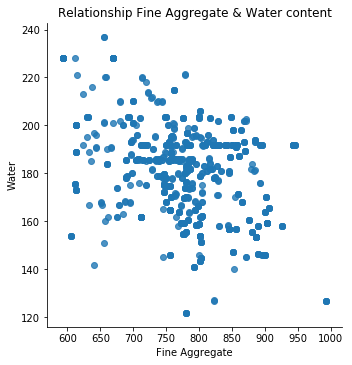

In [19]:
sns.lmplot(x='fineagg',y='water',data=data_orig, fit_reg=False)
plt.xlabel('Fine Aggregate')
plt.ylabel('Water')
plt.title('Relationship Fine Aggregate & Water content')

Text(0.5, 1.0, 'Relationship Super plastic & Water content')

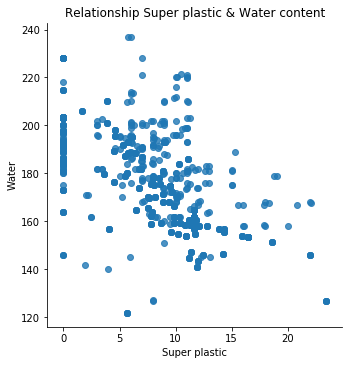

In [20]:
sns.lmplot(x='superplastic',y='water',data=data_orig, fit_reg=False)
plt.xlabel('Super plastic')
plt.ylabel('Water')
plt.title('Relationship Super plastic & Water content')

# Step 6 - Finding Correlation Matrix with Heatmap

    - One of the other ways we can find correlation for this dataset is to plot a HeatMap which would show corerelation between each feature.

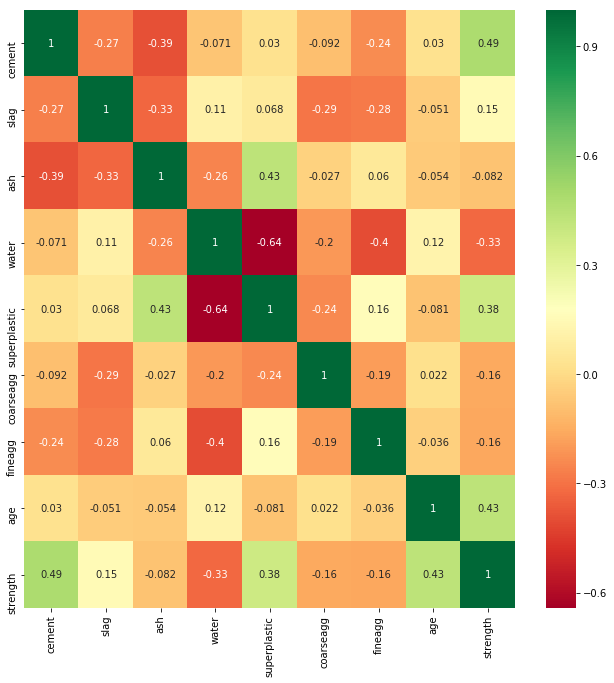

In [21]:
corelation_matrix = data_orig.corr()
top_corelation_features = corelation_matrix.index
plt.figure(figsize=(11,11))
g = sns.heatmap(data_orig[top_corelation_features].corr(), annot=True, cmap='RdYlGn')